In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/Dataset_CNN/Traffic_Sign"

train_dir = data_dir + '/Train'
test_dir = data_dir + '/Test'

In [ ]:
import os
from PIL import Image



for subdir in os.listdir(train_dir):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        extension = os.path.splitext(filename)[1].lower()
        if extension not in ['.jpg', '.jpeg', '.png']:
            print(f"Skipping {file_path} due to invalid file extension")
            continue
        try:
            with Image.open(file_path) as img:
                pass
        except:
            print(f"Deleting {file_path}")
            os.remove(file_path)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import PIL
import tensorflow as tf
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


In [ ]:
# Set batch size and image size
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Load training data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory= train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)

Found 15895 files belonging to 4 classes.
Using 12716 files for training.


In [ ]:
# Load validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False
)

Found 15895 files belonging to 4 classes.
Using 3179 files for validation.


In [ ]:
# Print class names
class_names = train_ds.class_names
print("Class names: ", class_names)

Class names:  ['Caution', 'Instructions', 'No Passing', 'OverSpeed']


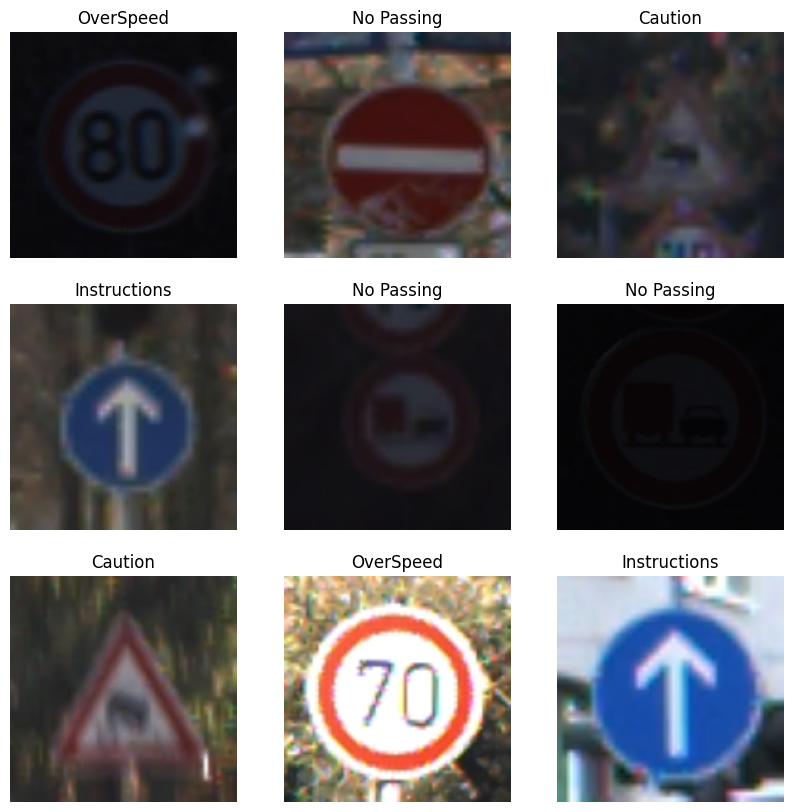

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:


from tensorflow.keras import layers, regularizers

def generate_model(image_height, image_width, nchannels, num_classes):
     model = tf.keras.Sequential([
          layers.experimental.preprocessing.RandomFlip("horizontal"),
          layers.experimental.preprocessing.RandomRotation(0.1),

         # Rescaling and input layer, [For keras the input shape must be(image height, image width, channels)]
         layers.Rescaling(1./255, input_shape=(image_height,image_width,nchannels)),

         # First Block of Convolution and Pooling Operations.
         layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
         layers.BatchNormalization(),
         layers.MaxPooling2D(pool_size=(2, 2)),
         layers.Dropout(0.25),

         # Second Block of Convolution and Pooling Operations.
         layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
         layers.BatchNormalization(),
         layers.MaxPooling2D(pool_size=(2, 2)),
         layers.Dropout(0.25),

         # Third Block of Convolution and Pooling Operations.
         layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
         layers.BatchNormalization(),
         layers.MaxPooling2D(pool_size=(2, 2)),
         layers.Dropout(0.25),

         # Fully connected classifier.
         layers.Flatten(),
         layers.Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
         layers.Dropout(0.5),
         layers.Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
     ])
     return model


# def generate_model(image_height, image_width, nchannels, num_classes):

#   model = tf.keras.Sequential([
#       # Rescaling and input layer
#       layers.Rescaling(1./255, input_shape=(image_height,image_width,nchannels)),
#       # First Block of Convolution and Pooling Operations
#       layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
#       layers.BatchNormalization(),
#       layers.MaxPooling2D(pool_size=(2, 2)),
#       layers.Dropout(0.25),
#       # Fully connected classifier
#       layers.Flatten(),
#       layers.Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#       layers.Dropout(0.5),
#       layers.Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
#   ])

#   return model











In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

In [ ]:
# Build the model with a specific input shape
model.build((None, img_height, img_width, 3))

# Print the model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_5 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 rescaling_12 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 batch_normalization_31 (Bat  (None, 224, 224, 8)      32        
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 8)    

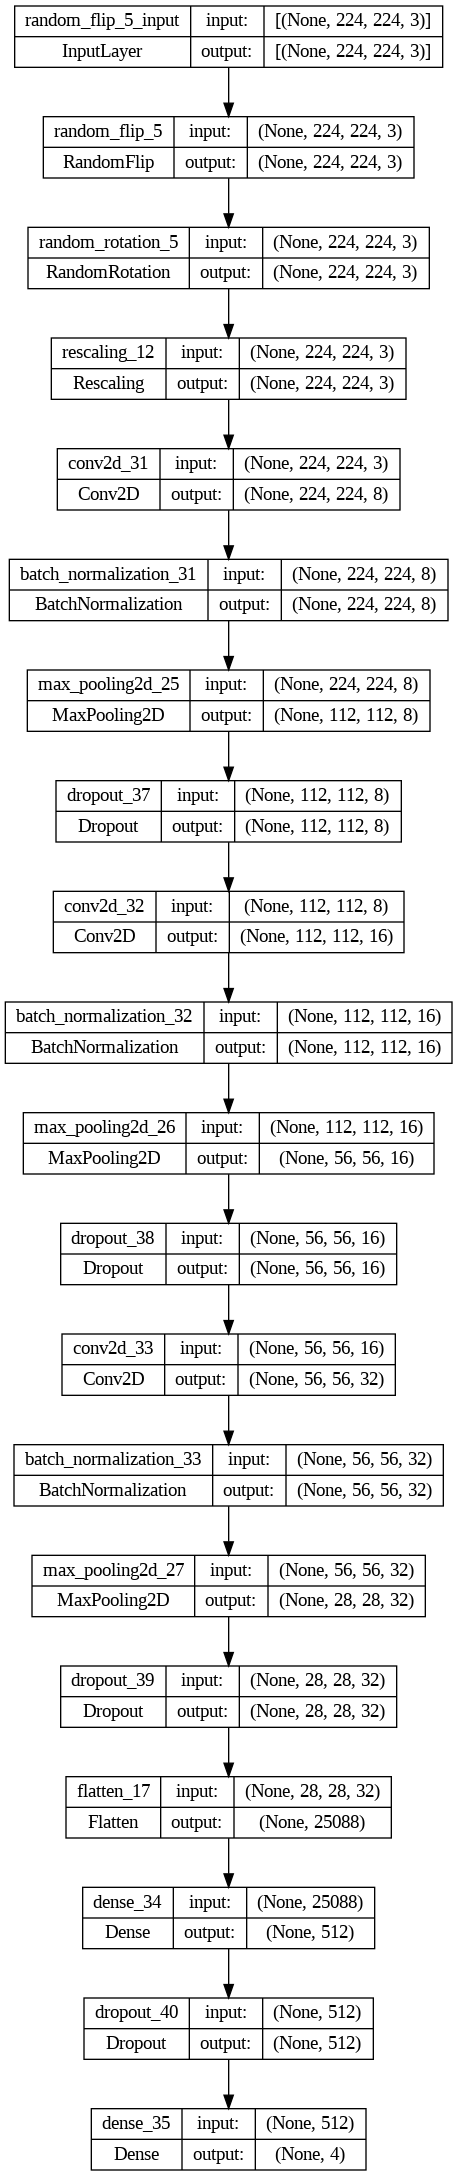

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
lr = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



In [ ]:
epochs= 8
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/8
398/398 [==============================] - 39s 85ms/step - loss: 2.8496 - accuracy: 0.8290 - val_loss: 10.6874 - val_accuracy: 0.4527
Epoch 2/8
398/398 [==============================] - 38s 94ms/step - loss: 1.2635 - accuracy: 0.8942 - val_loss: 1.3555 - val_accuracy: 0.9031
Epoch 3/8
398/398 [==============================] - 35s 87ms/step - loss: 1.5566 - accuracy: 0.8819 - val_loss: 1.7107 - val_accuracy: 0.9019
Epoch 4/8
398/398 [==============================] - 34s 85ms/step - loss: 1.1586 - accuracy: 0.9169 - val_loss: 1.0604 - val_accuracy: 0.9094
Epoch 5/8
398/398 [==============================] - 36s 88ms/step - loss: 1.1494 - accuracy: 0.9078 - val_loss: 1.0307 - val_accuracy: 0.9330
Epoch 6/8
398/398 [==============================] - 35s 87ms/step - loss: 1.0003 - accuracy: 0.9223 - val_loss: 0.8391 - val_accuracy: 0.9494
Epoch 7/8
398/398 [==============================] - 40s 99ms/step - loss: 1.1848 - accuracy: 0.9169 - val_loss: 1.1199 - val_accuracy: 0.950

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs_range = range(epochs)

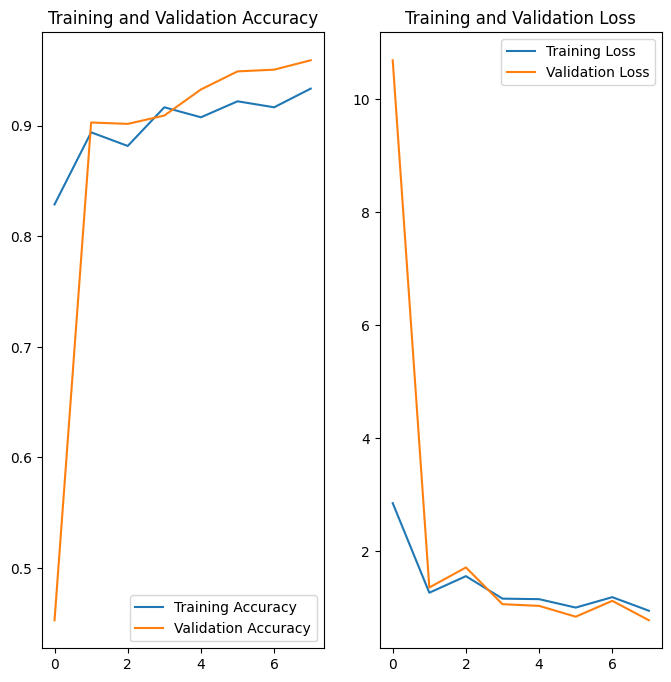

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the test images
test_images = []
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        img_path = os.path.join(test_dir, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        test_images.append(img_array)






In [ ]:
# Preprocess the test images
test_images = np.array(test_images)
test_images = test_images / 255.0




In [ ]:
predictions = model.predict(test_images)

1/1 [==============================] - 0s 193ms/step


In [ ]:
# Print the predictions for each image
for i in range(len(predictions)):
    print("Prediction for image ", i+1, ": ", class_names[np.argmax(predictions[i])])




Prediction for image  1 :  OverSpeed
Prediction for image  2 :  OverSpeed
Prediction for image  3 :  OverSpeed
Prediction for image  4 :  OverSpeed


In [ ]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model, excluding the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a new top classification layer for our dataset
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with an optimizer and a loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

# Train the model with fine-tuning the last block of the convolutional layers
history = model.fit(
        train_generator,
        epochs=5,
        validation_data=validation_generator,
        verbose=1,
        steps_per_epoch=len(train_generator),
        validation_steps=len(validation_generator),
        workers=4)


Found 12719 images belonging to 4 classes.
Found 3176 images belonging to 4 classes.
Epoch 1/5
398/398 [==============================] - 186s 456ms/step - loss: 0.3011 - accuracy: 0.8851 - val_loss: 2.8894 - val_accuracy: 0.7840
Epoch 2/5
398/398 [==============================] - 176s 438ms/step - loss: 0.1238 - accuracy: 0.9583 - val_loss: 3.2462 - val_accuracy: 0.7972
Epoch 3/5
398/398 [==============================] - 178s 444ms/step - loss: 0.0841 - accuracy: 0.9733 - val_loss: 3.4068 - val_accuracy: 0.7834
Epoch 4/5
398/398 [==============================] - 173s 432ms/step - loss: 0.0790 - accuracy: 0.9748 - val_loss: 3.7114 - val_accuracy: 0.7991
Epoch 5/5
398/398 [==============================] - 174s 435ms/step - loss: 0.0613 - accuracy: 0.9782 - val_loss: 4.3678 - val_accuracy: 0.7796


In [ ]:
from tensorflow.keras.preprocessing import image

# Load the test images
test_images = []
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        img_path = os.path.join(test_dir, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        test_images.append(img_array)

In [ ]:
# Preprocess the test images
test_images = np.array(test_images)
test_images = test_images / 255.0


In [ ]:
predictions = model.predict(test_images)

1/1 [==============================] - 0s 89ms/step


In [ ]:
# Print the predictions for each image
for i in range(len(predictions)):
    print("Prediction for image ", i+1, ": ", class_names[np.argmax(predictions[i])])

Prediction for image  1 :  Caution
Prediction for image  2 :  Caution
Prediction for image  3 :  OverSpeed
Prediction for image  4 :  No Passing
